<a href="https://colab.research.google.com/github/4k4m/Group_12_CS112/blob/main/Week_0/Parallel_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sequential merge sort

In [ ]:
def merge_sorted_arrays(array_1, array_2):
  result_array = []
  len_of_arr_1 = array_1.__len__()
  len_of_arr_2 = array_2.__len__()
  idx_1 = 0
  idx_2 = 0
  while idx_1 < len_of_arr_1 and idx_2 < len_of_arr_2:
    if array_1[idx_1] < array_2[idx_2]:
      result_array.append(array_1[idx_1])
      idx_1 += 1
    else:
      result_array.append(array_2[idx_2])
      idx_2 += 1
  while idx_1 < len_of_arr_1:
    result_array.append(array_1[idx_1])
    idx_1 += 1
  while idx_2 < len_of_arr_2:
    result_array.append(array_2[idx_2])
    idx_2 += 1
  return result_array

In [ ]:
def sequential_merge_sort(array):
  len_of_arr = array.__len__()
  if len_of_arr == 1:
    return array
  mid_idx = len_of_arr // 2
  left_arr = sequential_merge_sort(array[:mid_idx])
  right_arr = sequential_merge_sort(array[mid_idx:])
  return merge_sorted_arrays(left_arr, right_arr)

## Parallel merge sort

In [ ]:
import multiprocessing as mp

def parallel_merge_sort(array):
  num_of_processes = mp.cpu_count()
  len_of_array = array.__len__()
  if len_of_array < num_of_processes:
    return sequential_merge_sort(array)
  len_of_chunk = len_of_array // num_of_processes
  pool = mp.Pool()
  chunks = [array[idx : min(idx + len_of_chunk, len_of_array)] for idx in range(0, len_of_array, len_of_chunk)]
  pool = mp.Pool(processes = num_of_processes)
  results_of_chunk = pool.map(sequential_merge_sort, chunks)
  result = []
  for sub_result in results_of_chunk:
    result = merge_sorted_arrays(result, sub_result)
  return result

## Measure execution time for each algorithm

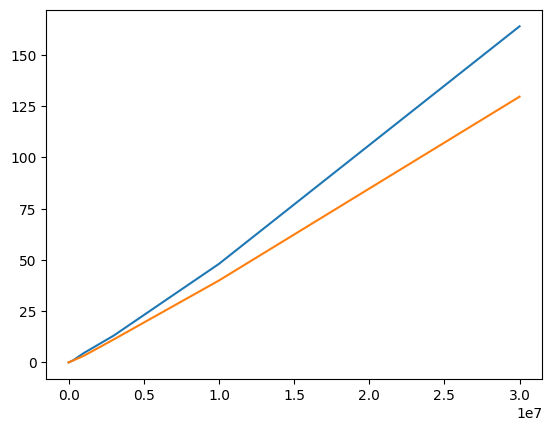

In [ ]:
import time
import random
import matplotlib.pyplot as plt

len_to_test = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000]
time_for_sequential = []
time_for_parallel = []

for len_of_array in len_to_test:
  array = []
  for _ in range(len_of_array):
    array.append(random.randint(0, len_of_array))
  start_time = time.time()
  _ = sequential_merge_sort(array)
  end_time = time.time()
  time_for_sequential.append(end_time - start_time)
  start_time = time.time()
  _ = parallel_merge_sort(array)
  end_time = time.time()
  time_for_parallel.append(end_time - start_time)

plt.semilogx(len_to_test, time_for_sequential, color = 'blue')
plt.semilogx(len_to_test, time_for_parallel, color = 'red')
plt.show()